# EDS 217, Lecture 4: DRY 🏜 vs. WET 🌊

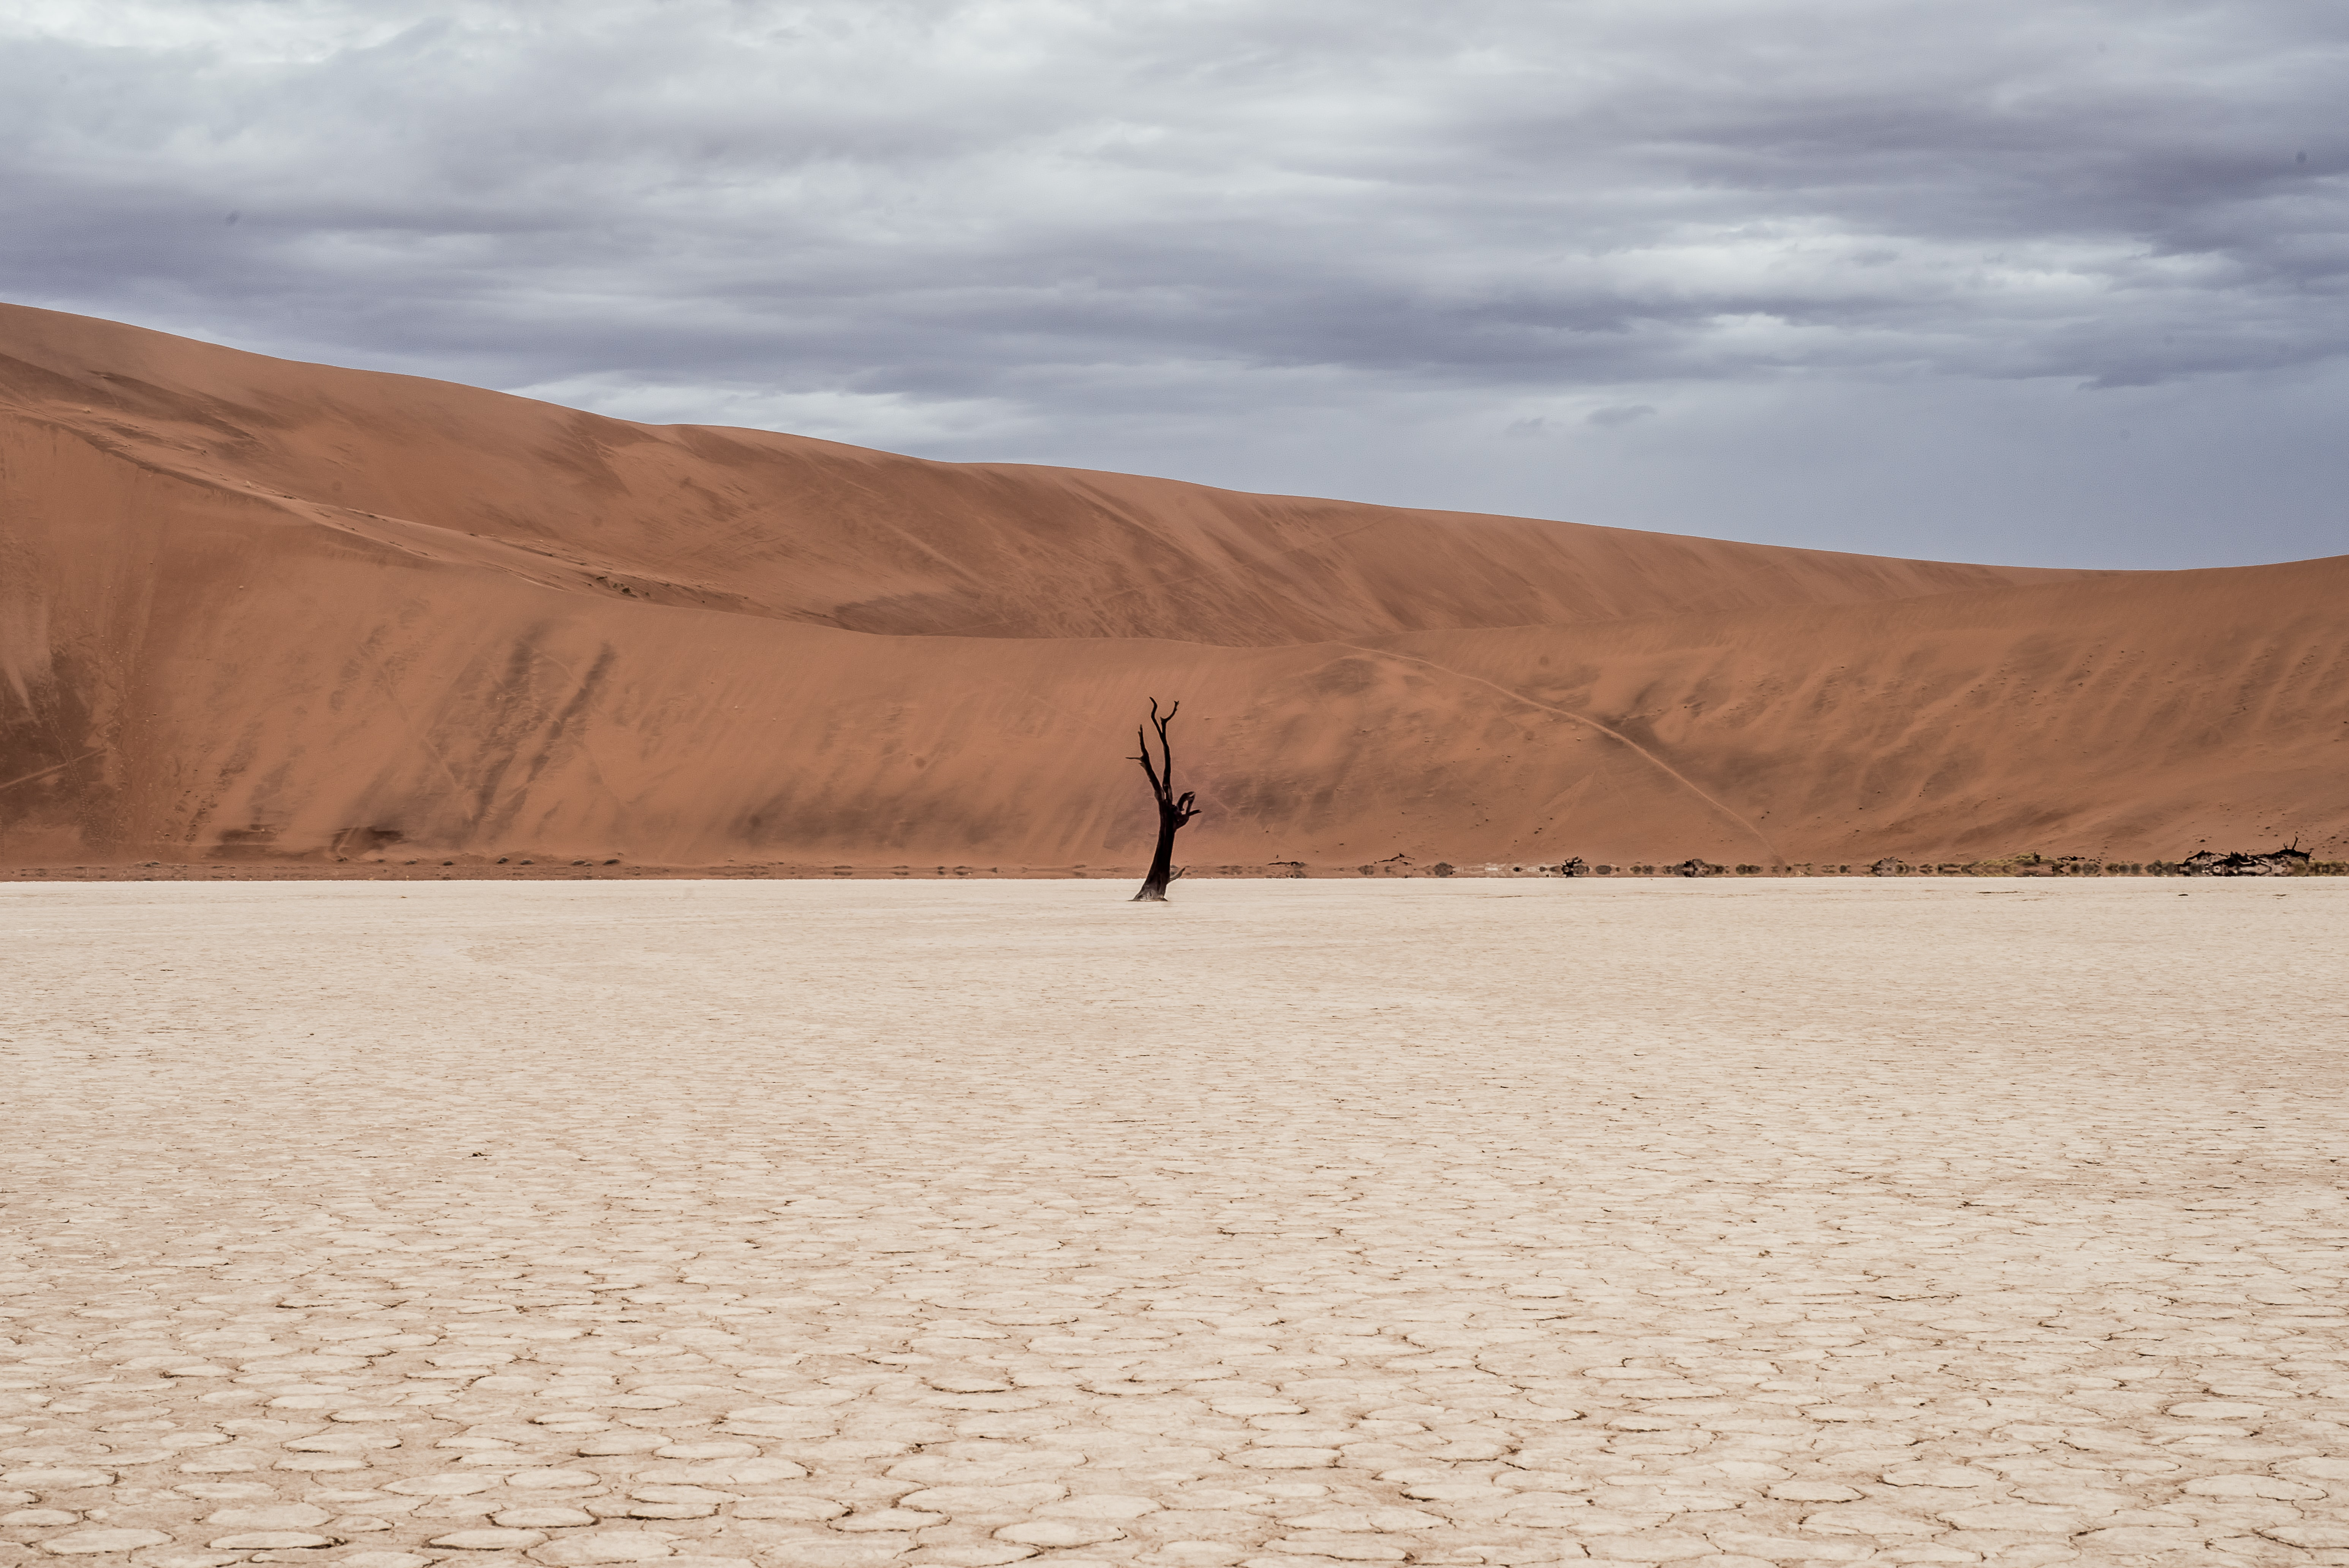

# DRY Programming




The idea of DRY is to **reduce the repetition of code**. 


## DRY vs. WET



If DRY means "Don't Repeat Yourself"... then WET means "Write Every Time", or "We Enjoy Typing"


Don't write WET code!



### How to DRY out your code

We write DRY code - or we DRY out WET code - through a combination of _abstraction_ and _normalization_.



## Abstraction

The "principle of abstraction" aims to _reduce duplication of information_ (usually code) in a program whenever it is practical to do so:

"Each significant piece of functionality in a program should be implemented in just one place in the source code. Where similar functions are carried out by distinct pieces of code, it is generally beneficial to combine them into one by abstracting out the varying parts."

Benjamin C. Pierce - [Types and Programming Languages](https://en.wikipedia.org/wiki/Types_and_Programming_Languages)



### Abstraction Example

The easiest way to understand abstraction is to see it in action. Here's an example that you are already familiar with; determining the energy emitted by an object as a function of its temperature:

$Q = \epsilon  \sigma  T^4$

where $\epsilon$ is an object's emmissivity, $\sigma$ is the Stefan-Boltzmann constant, and $T$ is temperature in degrees Kelvin. 

### Abstraction Example


We might write the following code to determine $Q$:

In [ ]:
# How much energy is emitted by an object at a certain temperature?
ε = 1      # emissivity [-]
σ = 5.67e-8  # stefan-boltzmann constant [W/T^4]
T_C = 40         # temperature [deg-C]

Q = ε * σ * (T_C+273.15)**4
print(Q)

### Abstraction Example

But this code is going to get very WET very fast.

In [ ]:
# How much energy is emitted by an object at a certain temperature?
ε = 1      # emissivity [-]
σ = 5.67e-8  # stefan-boltzmann constant [W/m^2/K^4]
T_C = 40         # temperature [deg-C]

Q = ε * σ * (T_C+273.15)**4

# New T value? Different epsilon? What about a bunch of T values?
T_2 = 30

Q2 = ε * σ * (T_2+273.15)**4



### Abstraction Example


Here's a DRY version obtained using abstraction:

In [ ]:
# energy.py contains a function to calculate Q from T 
from energy import Q 

T = 40 # deg-C
E = Q(T, unit='C')

### Abstraction Summary, Part 1

- We keep our code DRY by using _abstraction_. In addition to functions, python also provides `Classes` as another important way to create abstractions. 

- **Functions** and **Classes** are the subject of this tomorrow's exercise.



### Abstraction Summary, Part 2

- In general, the process of keeping code DRY through successive layers of abstraction is known as **re-factoring**. 

- The _"Rule of Three"_ states that you should probably consider refactoring (i.e. adding abstraction) whenever you find your code doing the same thing three times or more.



## Normalization


Normalization is the process of structuring data in order to reduce redundancy and improve integrity. 



## Normalization


Some of the key principles of Normalization include:

- All data have a `Primary Key`, which uniquely identifies a record. Usually, in python, this key is called an `Index`.
- `Atomic` columns, meaning entries contain a single value. This means no _collections_ should appear as elements within a data table. (i.e. "cells" in structured data should not contain lists!)
- No _transitive_ dependencies. This means that there should not be implicit associations between columns within data tables. 



### Primary Keys

This form of normalization is easy to obtain, as the idea of an `Index` is embedded in almost any Python data structure, and a core component of data structures witin `pandas`, which is the most popular data science library in python (coming next week!).


### Primary Keys


In [ ]:
# All DataFrames in pandas are created with an index (i.e unique primary key)
import pandas as pd
average_high_temps = [18.3, 18.3, 18.9, 20.6, 21.1, 21.7,
                      23.9, 24.4, 23.9, 22.8, 20.6, 18.3]
sb_high_temp = pd.DataFrame(
    average_high_temps, # This list will become a single column of values
    columns=['Average_High_Temperature'] # This is the name of the column
) # NOTE: use sb_high_temp.head() py->month_list
#sb_high_temp.index = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sb_high_temp.head()

### Atomic Columns

The idea of atomic columns is that each element in a data structure should contain a unique value. This requirement is harder to obtain and you will sometimes violate it.


In [ ]:
# import pandas as pd
average_high_temps = [18.3, 18.3, 18.9, 20.6, 21.1, 21.7, 23.9, 24.4, 23.9, 22.8, 20.6, 18.3]
average_rainfall = [110.7, 119.1, 74.2, 31.5, 8.4, 2.3, 0.5, 1.3, 3.6, 22.9, 45.5, 77.2]

# THIS DATAFRAME IS NOT ATOMIC. EACH ELEMENT IN THE COLUMN IS A LIST.
sb_climate = pd.DataFrame([
    [average_high_temps, # The first column will contain a list.
     average_rainfall]], # The second column will also contain a list.
    columns=['Monthly Average Temp', 'Monthly Average Rainfall'] # Column names
)
sb_climate.head()

### Atomic Columns

The idea of atomic columns is that each element in a data structure should contain a unique value. This requirement is harder to obtain and you will sometimes violate it.


In [ ]:
import pandas as pd
average_high_temps = [18.3, 18.3, 18.9, 20.6, 21.1, 21.7, 23.9, 24.4, 23.9, 22.8, 20.6, 18.3]
average_rainfall = [110.7, 119.1, 74.2, 31.5, 8.4, 2.3, 0.5, 1.3, 3.6, 22.9, 45.5, 77.2]

# THIS DATAFRAME IS ATOMIC. EACH ELEMENT IN THE COLUMN IS A SINGLE VALUE.
sb_climate = pd.DataFrame({ # Using a dict to create the data frame.
    'Average_High_Temperature':average_high_temps, # This is the first column
    'Average_Rainfall':average_rainfall # This is the second column
})
sb_climate.index = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sb_climate.head()

### Transitive  Dependencies

The idea of transitive dependencies is the inclusion of multiple associated attributes within the same data structure. 

- Transitive dependencies make _updating_ data very difficult, but they can be helpful in _analyzying_ data. 

- So we should only introduce them in data that we will not be editing. 

Usually environmental data, and especially timeseries, are rarely modified after creation. So we don't need to worry as much about these dependencies.

For example, contrast a data record of "temperatures through time" to a data record of "user contacts in a social network".


### Transitive  Dependencies

The idea of transitive dependencies is the inclusion of multiple associated attributes within the same data structure. 


In [ ]:
import pandas as pd
average_high_temps = [18.3, 18.3, 18.9, 20.6, 21.1, 21.7, 23.9, 24.4, 23.9, 22.8, 20.6, 18.3]
average_rainfall = [110.7, 119.1, 74.2, 31.5, 8.4, 2.3, 0.5, 1.3, 3.6, 22.9, 45.5, 77.2]

# TRANSITIVE ASSOCIATIONS EXIST BETWEEN MONTHS AND SEASONS IN THIS DATAFRAME:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
season = ['Winter', 'Winter', 'Spring', 'Spring', 'Spring', 'Summer', 'Summer', 'Summer', 'Fall', 'Fall', 'Fall', 'Winter']
sb_climate = pd.DataFrame({ # Using a dict to create the data frame.
    'Month': month,         # Adding month as the first column of the data frame
    'Season': season,       # Adding the season for each month (this is a transitive dependency)
    'Avg_High_Temp':average_high_temps, # This is the third column
    'Avg_Rain':average_rainfall         # This is the fourth column
})
sb_climate.head()

### Normalization Summary

In general, for data analysis, basic normalization is handled for you.

- For _read only_ data with fixed associations, a lack of normalization is manageable. 

- However, many analyses are easier if you structure your data in ways that are as normalized as possible.

- If you are _collecting_ data then it is important to develop an organization structure that is normalized. 




## The End